In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
import seaborn as sns
import pingouin as pg
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
df1 = pd.read_csv('Num.csv')
df1.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q34_6,Q34_7,Q34_8,Q35,Q37,Q38,Q39,Q39_6_TEXT,Q40,Q41
0,4/23/22 11:58,4/23/22 12:06,0,69.14.146.241,100,471,1,4/23/22 12:06,R_a3LgC44oQLNt5BL,NaN,...,1,0,6,2,1999,3,1,NaN,1,11.0
1,4/23/22 11:59,4/23/22 12:10,0,151.225.175.73,100,703,1,4/23/22 12:10,R_1jUQxNbIZ0JrqOB,NaN,...,1,0,7,2,2001,2,1,NaN,1,11.0
2,4/23/22 11:58,4/23/22 12:11,0,86.7.172.93,100,804,1,4/23/22 12:11,R_RV5e8YJ5bJwrJsZ,NaN,...,1,0,2,2,2002,3,4,NaN,1,7.0
3,4/23/22 12:00,4/23/22 12:15,0,146.90.88.36,100,906,1,4/23/22 12:15,R_1FhAhCAxjVQUEAa,NaN,...,0,0,7,1,2000,3,1,NaN,1,4.0
4,4/23/22 12:07,4/23/22 12:15,0,79.71.30.175,100,462,1,4/23/22 12:15,R_2QVyTh3Olz3Yxvu,NaN,...,0,0,5,2,2001,2,6,Pakistani,1,2.0


In [4]:
df1.fillna(0, inplace=True)
df1

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q34_6,Q34_7,Q34_8,Q35,Q37,Q38,Q39,Q39_6_TEXT,Q40,Q41
0,4/23/22 11:58,4/23/22 12:06,0,69.14.146.241,100,471,1,4/23/22 12:06,R_a3LgC44oQLNt5BL,0.0,...,1,0,6,2,1999,3,1,0,1,11.0
1,4/23/22 11:59,4/23/22 12:10,0,151.225.175.73,100,703,1,4/23/22 12:10,R_1jUQxNbIZ0JrqOB,0.0,...,1,0,7,2,2001,2,1,0,1,11.0
2,4/23/22 11:58,4/23/22 12:11,0,86.7.172.93,100,804,1,4/23/22 12:11,R_RV5e8YJ5bJwrJsZ,0.0,...,1,0,2,2,2002,3,4,0,1,7.0
3,4/23/22 12:00,4/23/22 12:15,0,146.90.88.36,100,906,1,4/23/22 12:15,R_1FhAhCAxjVQUEAa,0.0,...,0,0,7,1,2000,3,1,0,1,4.0
4,4/23/22 12:07,4/23/22 12:15,0,79.71.30.175,100,462,1,4/23/22 12:15,R_2QVyTh3Olz3Yxvu,0.0,...,0,0,5,2,2001,2,6,Pakistani,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,5/1/22 6:54,5/1/22 7:06,0,92.233.55.48,100,683,1,5/1/22 7:06,R_2EzRvgvTxuoCufZ,0.0,...,2,0,5,2,1999,3,1,0,1,1.0
149,5/1/22 7:17,5/1/22 7:25,0,87.115.131.226,100,501,1,5/1/22 7:25,R_4MVUnqERmyLkocF,0.0,...,7,0,6,1,2001,2,1,0,1,1.0
150,5/3/22 13:32,5/3/22 13:46,0,155.246.63.46,100,838,1,5/3/22 13:46,R_2ahIZIegcLUNTDU,0.0,...,0,0,0,2,2003,3,1,0,1,11.0
151,5/3/22 13:40,5/3/22 13:59,0,155.246.208.31,100,1114,1,5/3/22 13:59,R_28B2hHX9SQYCgQ1,0.0,...,3,4,7,2,2003,2,1,0,1,0.0


In [5]:
df = df1[(df1.Q2 != '60d8d57e8cda444117347525' ) & (df1.Q2 != '5f6f31f7a28898067fb4c50f') & (df1.Q2 != '5eb54c7d324cf904c5ae20db') & (df1.Q2 != '5c913839a6e0aa00162c2ca5') & (df1.Q2 != '5bd4f33c4b4f9e0001130cc5' ) & (df1.Q2 != '612865b9193239815830941c') & (df1.Q2 != '5c6f00110b99a000018cc3c1')]
df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q34_6,Q34_7,Q34_8,Q35,Q37,Q38,Q39,Q39_6_TEXT,Q40,Q41
0,4/23/22 11:58,4/23/22 12:06,0,69.14.146.241,100,471,1,4/23/22 12:06,R_a3LgC44oQLNt5BL,0.0,...,1,0,6,2,1999,3,1,0,1,11.0
1,4/23/22 11:59,4/23/22 12:10,0,151.225.175.73,100,703,1,4/23/22 12:10,R_1jUQxNbIZ0JrqOB,0.0,...,1,0,7,2,2001,2,1,0,1,11.0
2,4/23/22 11:58,4/23/22 12:11,0,86.7.172.93,100,804,1,4/23/22 12:11,R_RV5e8YJ5bJwrJsZ,0.0,...,1,0,2,2,2002,3,4,0,1,7.0
3,4/23/22 12:00,4/23/22 12:15,0,146.90.88.36,100,906,1,4/23/22 12:15,R_1FhAhCAxjVQUEAa,0.0,...,0,0,7,1,2000,3,1,0,1,4.0
4,4/23/22 12:07,4/23/22 12:15,0,79.71.30.175,100,462,1,4/23/22 12:15,R_2QVyTh3Olz3Yxvu,0.0,...,0,0,5,2,2001,2,6,Pakistani,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,5/1/22 6:54,5/1/22 7:06,0,92.233.55.48,100,683,1,5/1/22 7:06,R_2EzRvgvTxuoCufZ,0.0,...,2,0,5,2,1999,3,1,0,1,1.0
149,5/1/22 7:17,5/1/22 7:25,0,87.115.131.226,100,501,1,5/1/22 7:25,R_4MVUnqERmyLkocF,0.0,...,7,0,6,1,2001,2,1,0,1,1.0
150,5/3/22 13:32,5/3/22 13:46,0,155.246.63.46,100,838,1,5/3/22 13:46,R_2ahIZIegcLUNTDU,0.0,...,0,0,0,2,2003,3,1,0,1,11.0
151,5/3/22 13:40,5/3/22 13:59,0,155.246.208.31,100,1114,1,5/3/22 13:59,R_28B2hHX9SQYCgQ1,0.0,...,3,4,7,2,2003,2,1,0,1,0.0


###### 

In [6]:
def value1(x):
    if x == 0:
        return '0'
    else:
        return '1'
    
df['Q6a'] = df['Q6'].apply(value1)
print(df.Q6a)    

0      1
1      0
2      0
3      1
4      0
      ..
148    0
149    0
150    0
151    1
152    0
Name: Q6a, Length: 148, dtype: object


In [7]:
def value2(y):
    if y == 0:
        return '0'
    else:
        return '2'
    
df['Q8a'] = df['Q8'].apply(value2)
print(df.Q8a)

0      0
1      0
2      2
3      0
4      2
      ..
148    2
149    0
150    2
151    0
152    0
Name: Q8a, Length: 148, dtype: object


In [8]:
def value3(z):
    if z == 0:
        return '0'
    else:
        return '3'
    
df['Q10a'] = df['Q10'].apply(value3)
print(df.Q10a)

0      0
1      3
2      0
3      0
4      0
      ..
148    0
149    3
150    0
151    0
152    3
Name: Q10a, Length: 148, dtype: object


In [9]:
df['affect_mani'] = df["Q6a"].astype('int') + df["Q8a"].astype('int')  +  df["Q10a"].astype('int') 
df.affect_mani

0      1
1      3
2      2
3      1
4      2
      ..
148    2
149    3
150    2
151    1
152    3
Name: affect_mani, Length: 148, dtype: int64

In [10]:
df['a'] = df['Q6a'].apply(str).str.replace('1','positive')
df['a']

0      positive
1             0
2             0
3      positive
4             0
         ...   
148           0
149           0
150           0
151    positive
152           0
Name: a, Length: 148, dtype: object

In [11]:
df['b'] = df['Q8a'].apply(str).str.replace('2','negative')
df['b']

0             0
1             0
2      negative
3             0
4      negative
         ...   
148    negative
149           0
150    negative
151           0
152           0
Name: b, Length: 148, dtype: object

In [12]:
df['c'] = df['Q10a'].apply(str).str.replace('3','neutral')
df['c']

0            0
1      neutral
2            0
3            0
4            0
        ...   
148          0
149    neutral
150          0
151          0
152    neutral
Name: c, Length: 148, dtype: object

In [13]:
df['emotion1'] = df['affect_mani'].apply(str).str.replace('1','positive')
df['emotion1']

0      positive
1             3
2             2
3      positive
4             2
         ...   
148           2
149           3
150           2
151    positive
152           3
Name: emotion1, Length: 148, dtype: object

In [14]:
df['emotion2'] = df['emotion1'].apply(str).str.replace('2','negative')
df['emotion2']

0      positive
1             3
2      negative
3      positive
4      negative
         ...   
148    negative
149           3
150    negative
151    positive
152           3
Name: emotion2, Length: 148, dtype: object

In [15]:
df['Emotional condition'] = df['emotion2'].apply(str).str.replace('3','neutral')
df['Emotional condition']

0      positive
1       neutral
2      negative
3      positive
4      negative
         ...   
148    negative
149     neutral
150    negative
151    positive
152     neutral
Name: Emotional condition, Length: 148, dtype: object

In [16]:
a=df.groupby('affect_mani')['Q12'].std()
print(a)
b=df.groupby('affect_mani')['Q12'].mean()
print(b)

affect_mani
1    1.554290
2    1.621759
3    1.142143
Name: Q12, dtype: float64
affect_mani
1    7.204082
2    3.489796
3    4.960000
Name: Q12, dtype: float64


In [17]:
c=df.groupby('affect_mani')['Q17'].std()
print(c)
d=df.groupby('affect_mani')['Q17'].mean()
print(d)

affect_mani
1    1.527525
2    1.670574
3    1.249326
Name: Q17, dtype: float64
affect_mani
1    5.857143
2    5.204082
3    5.520000
Name: Q17, dtype: float64


In [18]:
df["change"]=df["Q17"] - df["Q12"]
df["change"]

0     -2
1     -2
2      2
3      1
4      0
      ..
148    1
149    0
150    5
151   -1
152    2
Name: change, Length: 148, dtype: int64

In [19]:
e=c-a
print(e)
f=d-b
print(f)

affect_mani
1   -0.026764
2    0.048815
3    0.107184
dtype: float64
affect_mani
1   -1.346939
2    1.714286
3    0.560000
dtype: float64


In [20]:
def value4(x):
    if x == 0:
        return '0'
    else:
        return '1'
    
df['Q14a'] = df['Q14_Click Count'].apply(value4)
print(df.Q14a)

0      1
1      0
2      1
3      1
4      0
      ..
148    1
149    0
150    1
151    0
152    1
Name: Q14a, Length: 148, dtype: object


In [21]:
def value5(x):
    if x == 0:
        return '0'
    else:
        return '2'
    
df['Q16a'] = df['Q16_Click Count'].apply(value5)
print(df.Q16a)

0      0
1      2
2      0
3      0
4      2
      ..
148    0
149    2
150    0
151    2
152    0
Name: Q16a, Length: 148, dtype: object


In [22]:
df['bot'] = df["Q14a"].astype('int') + df["Q16a"].astype('int') 
df.bot

0      1
1      2
2      1
3      1
4      2
      ..
148    1
149    2
150    1
151    2
152    1
Name: bot, Length: 148, dtype: int64

In [23]:
df['Bot'] = df['bot'].replace(['2'],'-1')
df.Bot

0      1
1      2
2      1
3      1
4      2
      ..
148    1
149    2
150    1
151    2
152    1
Name: Bot, Length: 148, dtype: int64

In [24]:
df['bot1'] = df['bot'].apply(str).str.replace('1','empathetic')
df['bot1']

0      empathetic
1               2
2      empathetic
3      empathetic
4               2
          ...    
148    empathetic
149             2
150    empathetic
151             2
152    empathetic
Name: bot1, Length: 148, dtype: object

In [25]:
df['Bot condition'] = df['bot1'].apply(str).str.replace('2','non-empathetic')
df['Bot condition']

0          empathetic
1      non-empathetic
2          empathetic
3          empathetic
4      non-empathetic
            ...      
148        empathetic
149    non-empathetic
150        empathetic
151    non-empathetic
152        empathetic
Name: Bot condition, Length: 148, dtype: object

In [26]:
df['d'] = df['Q14a'].apply(str).str.replace('1','empathetic')
df['d']

0      empathetic
1               0
2      empathetic
3      empathetic
4               0
          ...    
148    empathetic
149             0
150    empathetic
151             0
152    empathetic
Name: d, Length: 148, dtype: object

In [27]:
df['e'] = df['Q16a'].apply(str).str.replace('2','non-empathetic')
df['e']

0                   0
1      non-empathetic
2                   0
3                   0
4      non-empathetic
            ...      
148                 0
149    non-empathetic
150                 0
151    non-empathetic
152                 0
Name: e, Length: 148, dtype: object

In [28]:
df['bot'].value_counts(dropna=False)

2    75
1    73
Name: bot, dtype: int64

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [30]:
model = ols('change ~ affect_mani + bot + affect_mani:bot', data=df).fit()
sm.stats.anova_lm(model, typ=2)
summary = model.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.9558,1.329,-0.719,0.473,-3.583,1.672
affect_mani,1.0156,0.610,1.666,0.098,-0.190,2.221
bot,-0.4060,0.814,-0.498,0.619,-2.016,1.204
affect_mani:bot,-0.0532,0.375,-0.142,0.888,-0.795,0.689


In [31]:
model_interaction = smf.ols(formula='change ~ affect_mani + bot + affect_mani:bot', data=df).fit()
summary = model_interaction.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.9558,1.329,-0.719,0.473,-3.583,1.672
affect_mani,1.0156,0.610,1.666,0.098,-0.190,2.221
bot,-0.4060,0.814,-0.498,0.619,-2.016,1.204
affect_mani:bot,-0.0532,0.375,-0.142,0.888,-0.795,0.689


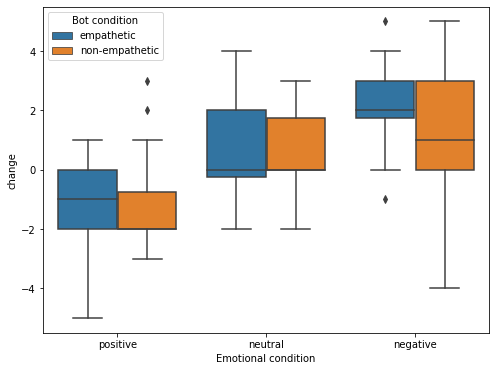

In [32]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="Emotional condition", y="change", hue="Bot condition", data=df)
plt.show()

1.Emotional Acknowledgement

In [33]:
df['Q18_3'] = df['Q18_3'].map({1:5, 2:4, 3:3, 4:2, 5:1})
df['Q18_4'] = df['Q18_4'].map({1:5, 2:4, 3:3, 4:2, 5:1})

In [34]:
df['EA_avg'] = df[['Q18_1','Q18_2','Q18_3','Q18_4']].mean(axis=1)
df['EA_avg']

0      3.75
1      1.75
2      4.25
3      3.25
4      1.00
       ... 
148    3.75
149    1.00
150    5.00
151    1.50
152    4.75
Name: EA_avg, Length: 148, dtype: float64

In [35]:
model = ols('EA_avg ~ affect_mani + bot + affect_mani:bot', data=df).fit()
sm.stats.anova_lm(model, typ=2)
summary = model.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,5.5254,0.638,8.659,0.000,4.264,6.787
affect_mani,0.0082,0.293,0.028,0.978,-0.570,0.587
bot,-1.8643,0.391,-4.768,0.000,-2.637,-1.091
affect_mani:bot,0.0068,0.180,0.038,0.970,-0.349,0.363


In [36]:
model_interaction = smf.ols(formula='EA_avg ~ affect_mani + bot + affect_mani:bot', data=df).fit()
summary = model_interaction.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,5.5254,0.638,8.659,0.000,4.264,6.787
affect_mani,0.0082,0.293,0.028,0.978,-0.570,0.587
bot,-1.8643,0.391,-4.768,0.000,-2.637,-1.091
affect_mani:bot,0.0068,0.180,0.038,0.970,-0.349,0.363


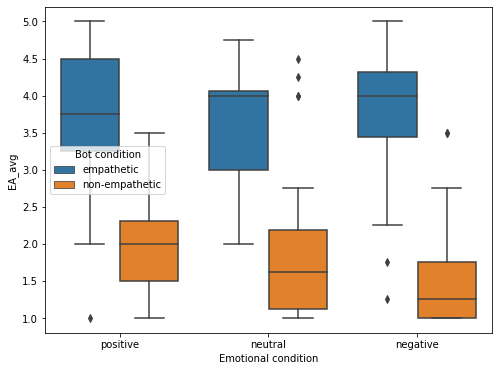

In [37]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="Emotional condition", y="EA_avg", hue="Bot condition", data=df)
plt.show()

2.Trust on Chatbot

In [38]:
df['TOC_avg'] = df[['Q19_1','Q19_2','Q19_3','Q19_4']].mean(axis=1)
df['TOC_avg']

0      3.75
1      2.25
2      4.00
3      3.75
4      2.00
       ... 
148    2.50
149    1.50
150    5.00
151    2.50
152    4.25
Name: TOC_avg, Length: 148, dtype: float64

In [39]:
model = ols('TOC_avg ~ affect_mani + bot + affect_mani:bot', data=df).fit()
sm.stats.anova_lm(model, typ=2)
summary = model.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.9014,0.642,6.078,0.000,2.633,5.170
affect_mani,0.0140,0.294,0.048,0.962,-0.568,0.596
bot,-0.4883,0.393,-1.242,0.216,-1.266,0.289
affect_mani:bot,-0.0285,0.181,-0.157,0.875,-0.387,0.330


In [40]:
model_interaction = smf.ols(formula='TOC_avg ~ affect_mani + bot + affect_mani:bot', data=df).fit()
summary = model_interaction.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.9014,0.642,6.078,0.000,2.633,5.170
affect_mani,0.0140,0.294,0.048,0.962,-0.568,0.596
bot,-0.4883,0.393,-1.242,0.216,-1.266,0.289
affect_mani:bot,-0.0285,0.181,-0.157,0.875,-0.387,0.330


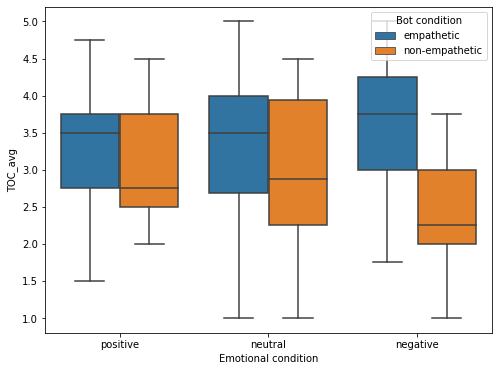

In [41]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="Emotional condition", y="TOC_avg", hue="Bot condition", data=df)
plt.show()

3.Effort

In [42]:
df['Q20_3'] = df['Q20_3'].map({1:5, 2:4, 3:3, 4:2, 5:1})

In [43]:
df['E_avg'] = df[['Q20_1','Q20_2','Q20_4','Q20_5','Q20_6']].mean(axis=1)
df['E_avg']

0      3.8
1      3.6
2      3.2
3      3.8
4      1.0
      ... 
148    1.2
149    1.6
150    5.0
151    2.4
152    3.4
Name: E_avg, Length: 148, dtype: float64

In [44]:
model = ols('E_avg ~ affect_mani + bot + affect_mani:bot', data=df).fit()
sm.stats.anova_lm(model, typ=2)
summary = model.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,4.3153,0.746,5.784,0.000,2.840,5.790
affect_mani,-0.2105,0.342,-0.615,0.540,-0.887,0.466
bot,-0.6831,0.457,-1.494,0.137,-1.587,0.220
affect_mani:bot,0.1262,0.211,0.599,0.550,-0.290,0.543


In [45]:
model_interaction = smf.ols(formula='E_avg ~ affect_mani + bot + affect_mani:bot', data=df).fit()
summary = model_interaction.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,4.3153,0.746,5.784,0.000,2.840,5.790
affect_mani,-0.2105,0.342,-0.615,0.540,-0.887,0.466
bot,-0.6831,0.457,-1.494,0.137,-1.587,0.220
affect_mani:bot,0.1262,0.211,0.599,0.550,-0.290,0.543


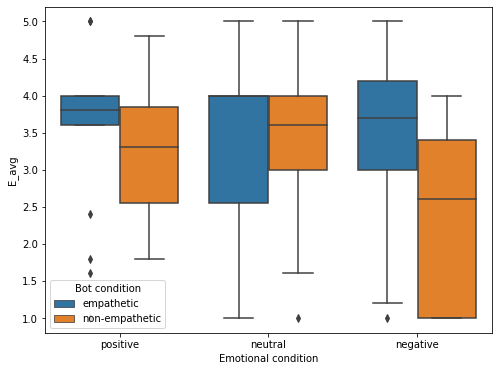

In [46]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="Emotional condition", y="E_avg", hue="Bot condition", data=df)
plt.show()

4.Liking

In [47]:
df['Q21_1'] = df['Q21_1'].map({6:1, 7:2, 8:3, 9:4, 10:5})
df['Q21_2'] = df['Q21_2'].map({6:1, 7:2, 8:3, 9:4, 10:5})
df['Q21_3'] = df['Q21_3'].map({6:1, 7:2, 8:3, 9:4, 10:5})

In [48]:
df['Q21_4'] = df['Q21_4'].map({10:1, 9:2, 8:3, 7:4, 6:5})

In [49]:
df['L_avg'] = df[['Q21_1','Q21_2','Q21_3','Q21_4']].mean(axis=1)
df['L_avg']

0      2.75
1      4.00
2      2.50
3      4.00
4      1.00
       ... 
148    1.75
149    1.00
150    5.00
151    2.25
152    4.75
Name: L_avg, Length: 148, dtype: float64

In [50]:
model = ols('L_avg ~ affect_mani + bot + affect_mani:bot', data=df).fit()
sm.stats.anova_lm(model, typ=2)
summary = model.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.7541,0.756,4.963,0.000,2.259,5.249
affect_mani,0.1434,0.347,0.413,0.680,-0.542,0.829
bot,-0.4067,0.463,-0.878,0.382,-1.323,0.509
affect_mani:bot,-0.0854,0.214,-0.400,0.690,-0.508,0.337


In [51]:
model_interaction = smf.ols(formula='L_avg ~ affect_mani + bot + affect_mani:bot', data=df).fit()
summary = model_interaction.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.7541,0.756,4.963,0.000,2.259,5.249
affect_mani,0.1434,0.347,0.413,0.680,-0.542,0.829
bot,-0.4067,0.463,-0.878,0.382,-1.323,0.509
affect_mani:bot,-0.0854,0.214,-0.400,0.690,-0.508,0.337


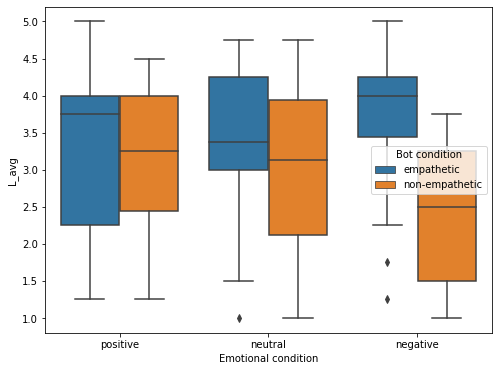

In [52]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="Emotional condition", y="L_avg", hue="Bot condition", data=df)
plt.show()


5.Perspective Taking


In [53]:
df1['Q22_1'] = df['Q22_1'].map({6:1, 7:2, 8:3, 9:4, 10:5})
df1['Q22_2'] = df['Q22_2'].map({6:1, 7:2, 8:3, 9:4, 10:5})
df1['Q22_3'] = df['Q22_3'].map({6:1, 7:2, 8:3, 9:4, 10:5})

In [54]:
df['PT_avg'] = df1[['Q22_1','Q22_2','Q22_3']].mean(axis=1)
df['PT_avg']

0      1.333333
1      2.000000
2      1.666667
3      3.000000
4      1.000000
         ...   
148    1.000000
149    1.000000
150    4.000000
151    1.333333
152    3.666667
Name: PT_avg, Length: 148, dtype: float64

In [55]:
model = ols('PT_avg ~ affect_mani + bot + affect_mani:bot', data=df).fit()
sm.stats.anova_lm(model, typ=2)
summary = model.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.0407,0.752,4.046,0.000,1.555,4.526
affect_mani,-0.2548,0.345,-0.739,0.461,-0.936,0.427
bot,-0.6719,0.460,-1.459,0.147,-1.582,0.238
affect_mani:bot,0.1547,0.212,0.729,0.467,-0.265,0.574


In [56]:
model_interaction = smf.ols(formula='PT_avg ~ affect_mani + bot + affect_mani:bot', data=df).fit()
summary = model_interaction.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.0407,0.752,4.046,0.000,1.555,4.526
affect_mani,-0.2548,0.345,-0.739,0.461,-0.936,0.427
bot,-0.6719,0.460,-1.459,0.147,-1.582,0.238
affect_mani:bot,0.1547,0.212,0.729,0.467,-0.265,0.574


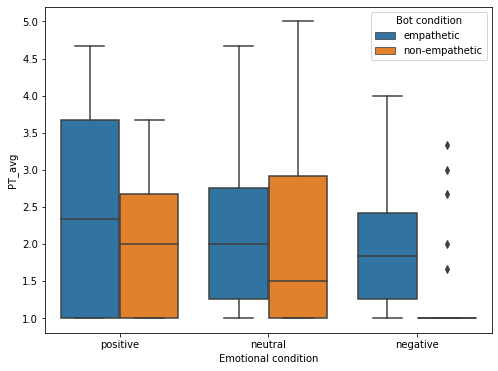

In [57]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="Emotional condition", y="PT_avg", hue="Bot condition", data=df)
plt.show()

Empathy


In [58]:
df1['Q23_1'] = df['Q23_1'].map({6:1, 7:2, 8:3, 9:4, 10:5})
df1['Q23_2'] = df['Q23_2'].map({6:1, 7:2, 8:3, 9:4, 10:5})
df1['Q23_3'] = df['Q23_3'].map({6:1, 7:2, 8:3, 9:4, 10:5})

In [59]:
df['Em_avg'] = df1[['Q23_1','Q23_2','Q23_3']].mean(axis=1)
df['Em_avg']

0      4.000000
1      2.000000
2      4.333333
3      4.000000
4      1.000000
         ...   
148    4.000000
149    1.000000
150    4.000000
151    1.666667
152    5.000000
Name: Em_avg, Length: 148, dtype: float64

In [60]:
model = ols('Em_avg ~ affect_mani + bot + affect_mani:bot', data=df).fit()
sm.stats.anova_lm(model, typ=2)
summary = model.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,4.8585,0.716,6.785,0.000,3.443,6.274
affect_mani,0.2265,0.328,0.689,0.492,-0.423,0.876
bot,-1.3848,0.439,-3.157,0.002,-2.252,-0.518
affect_mani:bot,-0.0648,0.202,-0.320,0.749,-0.465,0.335


In [61]:
model_interaction = smf.ols(formula='Em_avg ~ affect_mani + bot + affect_mani:bot', data=df).fit()
summary = model_interaction.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,4.8585,0.716,6.785,0.000,3.443,6.274
affect_mani,0.2265,0.328,0.689,0.492,-0.423,0.876
bot,-1.3848,0.439,-3.157,0.002,-2.252,-0.518
affect_mani:bot,-0.0648,0.202,-0.320,0.749,-0.465,0.335


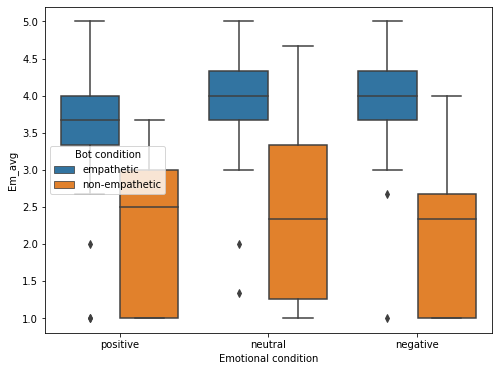

In [62]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="Emotional condition", y="Em_avg", hue="Bot condition", data=df)
plt.show()

7.Trust

In [63]:
df1['Q26_1'] = df['Q26_1'].map({3:1, 5:2, 6:3, 7:4, 8:5})
df1['Q26_2'] = df['Q26_2'].map({3:1, 5:2, 6:3, 7:4, 8:5})
df1['Q26_3'] = df['Q26_3'].map({3:1, 5:2, 6:3, 7:4, 8:5})
df['Q26_4'] = df['Q26_4'].map({3:1, 5:2, 6:3, 7:4, 8:5})
df['Q26_5'] = df['Q26_5'].map({3:1, 5:2, 6:3, 7:4, 8:5})
df['Q26_6'] = df['Q26_6'].map({3:1, 5:2, 6:3, 7:4, 8:5})

In [64]:
df['Q26_1'] = df1['Q26_1'].map({1:5, 2:4, 3:3, 4:2, 5:1})
df['Q26_2'] = df1['Q26_2'].map({1:5, 2:4, 3:3, 4:2, 5:1})
df['Q26_3'] = df1['Q26_3'].map({1:5, 2:4, 3:3, 4:2, 5:1})

In [65]:
df['T_avg'] = df[['Q26_1','Q26_2','Q26_3','Q26_4','Q26_5','Q26_6','Q27_1','Q27_2','Q27_3','Q27_4','Q27_5']].mean(axis=1)
df['T_avg']

0      3.636364
1      3.727273
2      3.090909
3      3.272727
4      1.545455
         ...   
148    1.727273
149    1.818182
150    3.545455
151    2.363636
152    3.727273
Name: T_avg, Length: 148, dtype: float64

In [66]:
model = ols('T_avg ~ affect_mani + bot + affect_mani:bot', data=df).fit()
sm.stats.anova_lm(model, typ=2)
summary = model.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.7966,0.493,7.697,0.000,2.822,4.772
affect_mani,-0.0983,0.226,-0.435,0.664,-0.546,0.349
bot,-0.3245,0.302,-1.074,0.285,-0.922,0.273
affect_mani:bot,0.0385,0.139,0.276,0.783,-0.237,0.314


In [67]:
model_interaction = smf.ols(formula='T_avg ~ affect_mani + bot + affect_mani:bot', data=df).fit()
summary = model_interaction.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.7966,0.493,7.697,0.000,2.822,4.772
affect_mani,-0.0983,0.226,-0.435,0.664,-0.546,0.349
bot,-0.3245,0.302,-1.074,0.285,-0.922,0.273
affect_mani:bot,0.0385,0.139,0.276,0.783,-0.237,0.314


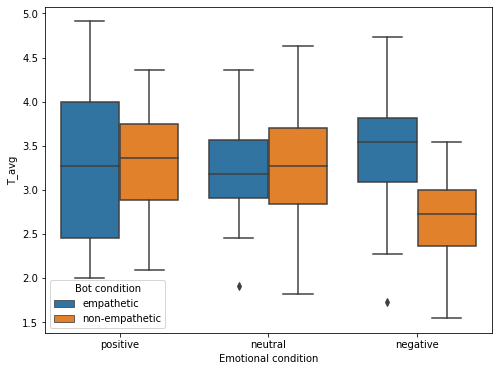

In [68]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="Emotional condition", y="T_avg", hue="Bot condition", data=df)
plt.show()

Expectancy Violation


In [69]:
df['Q24_5'] = df1['Q24_5'].map({1:5, 2:4, 3:3, 4:2, 5:1})
df['Q24_2'] = df1['Q24_2'].map({1:5, 2:4, 3:3, 4:2, 5:1})
df['Q24_3'] = df1['Q24_3'].map({1:5, 2:4, 3:3, 4:2, 5:1})

In [70]:
df['Ex_avg'] = df1[['Q24_1','Q24_2','Q24_3','Q24_4','Q24_5']].mean(axis=1)
df['Ex_avg']

0      3.4
1      3.4
2      2.8
3      3.6
4      2.2
      ... 
148    3.2
149    2.0
150    2.8
151    3.0
152    3.4
Name: Ex_avg, Length: 148, dtype: float64

In [71]:
model = ols('Ex_avg ~ affect_mani + bot + affect_mani:bot', data=df).fit()
sm.stats.anova_lm(model, typ=2)
summary = model.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.2452,0.275,11.818,0.000,2.702,3.788
affect_mani,-0.0391,0.126,-0.310,0.757,-0.288,0.210
bot,-0.0989,0.168,-0.588,0.558,-0.431,0.234
affect_mani:bot,0.0305,0.078,0.393,0.695,-0.123,0.184


In [72]:
model_interaction = smf.ols(formula='Ex_avg ~ affect_mani + bot + affect_mani:bot', data=df).fit()
summary = model_interaction.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.2452,0.275,11.818,0.000,2.702,3.788
affect_mani,-0.0391,0.126,-0.310,0.757,-0.288,0.210
bot,-0.0989,0.168,-0.588,0.558,-0.431,0.234
affect_mani:bot,0.0305,0.078,0.393,0.695,-0.123,0.184


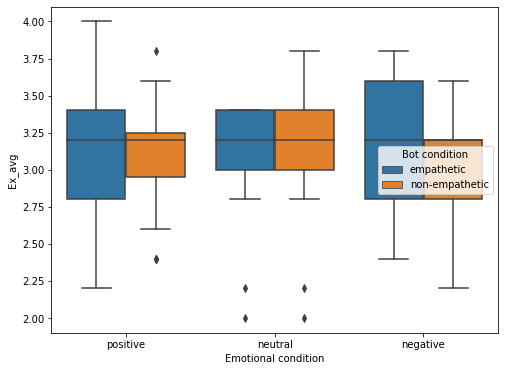

In [73]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="Emotional condition", y="Ex_avg", hue="Bot condition", data=df)
plt.show()

Violation Valence


In [74]:
df['Q25_2'] = df1['Q25_2'].map({1:5, 2:4, 3:3, 4:2, 5:1})
df['Q25_3'] = df1['Q25_3'].map({1:5, 2:4, 3:3, 4:2, 5:1})

In [75]:
df['vv_avg'] = df1[['Q25_1','Q25_2','Q25_3','Q25_4','Q25_5']].mean(axis=1)
df['vv_avg']

0      2.8
1      3.2
2      3.0
3      3.2
4      3.0
      ... 
148    2.4
149    2.6
150    3.4
151    3.2
152    3.4
Name: vv_avg, Length: 148, dtype: float64

In [76]:
model = ols('vv_avg ~ affect_mani + bot + affect_mani:bot', data=df).fit()
sm.stats.anova_lm(model, typ=2)
summary = model.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.7579,0.234,11.779,0.000,2.295,3.221
affect_mani,0.1138,0.107,1.060,0.291,-0.098,0.326
bot,0.0499,0.143,0.348,0.729,-0.234,0.333
affect_mani:bot,-0.0397,0.066,-0.601,0.549,-0.170,0.091


In [77]:
model_interaction = smf.ols(formula='vv_avg ~ affect_mani + bot + affect_mani:bot', data=df).fit()
summary = model_interaction.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.7579,0.234,11.779,0.000,2.295,3.221
affect_mani,0.1138,0.107,1.060,0.291,-0.098,0.326
bot,0.0499,0.143,0.348,0.729,-0.234,0.333
affect_mani:bot,-0.0397,0.066,-0.601,0.549,-0.170,0.091


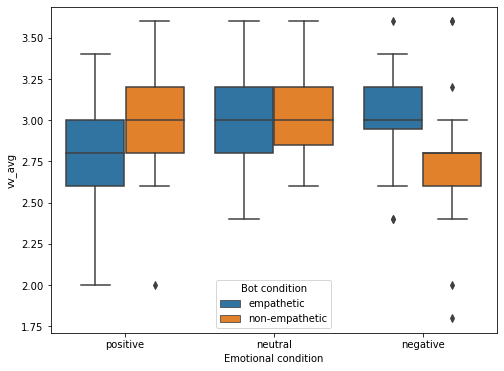

In [78]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="Emotional condition", y="vv_avg", hue="Bot condition", data=df)
plt.show()

Enjoyment

In [79]:
df['IE_avg'] = df1[['Q28_1','Q28_2','Q28_3']].mean(axis=1)
df['IE_avg']

0      2.000000
1      4.333333
2      1.666667
3      4.000000
4      1.000000
         ...   
148    1.333333
149    1.000000
150    4.666667
151    1.000000
152    5.000000
Name: IE_avg, Length: 148, dtype: float64

In [80]:
model = ols('IE_avg ~ affect_mani + bot + affect_mani:bot', data=df).fit()
sm.stats.anova_lm(model, typ=2)
summary = model.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.6740,0.905,4.059,0.000,1.885,5.463
affect_mani,0.0295,0.415,0.071,0.943,-0.791,0.850
bot,-0.5937,0.554,-1.071,0.286,-1.690,0.502
affect_mani:bot,0.0050,0.256,0.019,0.985,-0.500,0.510


In [81]:
model_interaction = smf.ols(formula='IE_avg ~ affect_mani + bot + affect_mani:bot', data=df).fit()
summary = model_interaction.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.6740,0.905,4.059,0.000,1.885,5.463
affect_mani,0.0295,0.415,0.071,0.943,-0.791,0.850
bot,-0.5937,0.554,-1.071,0.286,-1.690,0.502
affect_mani:bot,0.0050,0.256,0.019,0.985,-0.500,0.510


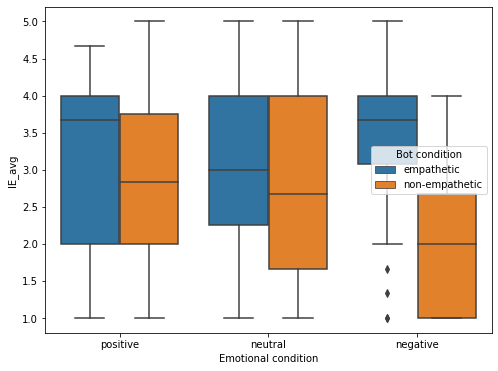

In [82]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="Emotional condition", y="IE_avg", hue="Bot condition", data=df)
plt.show()

Chatbot Knowledge

In [98]:
AIKnowledge=df1[['Q29_1','Q29_2']]
pg.cronbach_alpha(data=AIKnowledge)

(0.09982935153583639, array([-0.239,  0.346]))

In [84]:
df['AI_avg'] = df1[['Q29_1','Q29_2']].mean(axis=1)
df['AI_avg']

0      4.5
1      3.5
2      3.5
3      4.0
4      5.0
      ... 
148    4.0
149    3.0
150    4.0
151    4.0
152    5.0
Name: AI_avg, Length: 148, dtype: float64

In [85]:
model = ols('AI_avg ~ affect_mani + bot + affect_mani:bot', data=df).fit()
sm.stats.anova_lm(model, typ=2)
summary = model.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.4431,0.473,7.278,0.000,2.508,4.378
affect_mani,0.5488,0.217,2.528,0.013,0.120,0.978
bot,0.4068,0.290,1.404,0.163,-0.166,0.980
affect_mani:bot,-0.3242,0.134,-2.426,0.016,-0.588,-0.060


In [86]:
model_interaction = smf.ols(formula='AI_avg ~ affect_mani + bot + affect_mani:bot', data=df).fit()
summary = model_interaction.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.4431,0.473,7.278,0.000,2.508,4.378
affect_mani,0.5488,0.217,2.528,0.013,0.120,0.978
bot,0.4068,0.290,1.404,0.163,-0.166,0.980
affect_mani:bot,-0.3242,0.134,-2.426,0.016,-0.588,-0.060


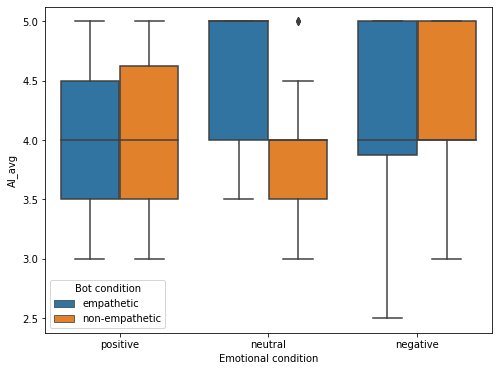

In [87]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="Emotional condition", y="AI_avg", hue="Bot condition", data=df)
plt.show()

Chatbot Usefulness

In [88]:
df['Q30'] = df['Q30'].map({2:1, 6:2, 7:3, 8:4, 9:5})

In [89]:
df['H_avg'] = df[['Q30','Q31']].mean(axis=1)
df['H_avg']

0      3.0
1      3.0
2      2.5
3      4.0
4      1.0
      ... 
148    2.0
149    2.0
150    4.0
151    2.5
152    3.5
Name: H_avg, Length: 148, dtype: float64

In [90]:
model = ols('H_avg ~ affect_mani + bot + affect_mani:bot', data=df).fit()
sm.stats.anova_lm(model, typ=2)
summary = model.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.6337,0.681,5.338,0.000,2.288,4.979
affect_mani,-0.0752,0.312,-0.241,0.810,-0.692,0.542
bot,-0.5319,0.417,-1.275,0.204,-1.356,0.292
affect_mani:bot,0.0790,0.192,0.411,0.682,-0.301,0.459


In [91]:
model_interaction = smf.ols(formula='H_avg ~ affect_mani + bot + affect_mani:bot', data=df).fit()
summary = model_interaction.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.6337,0.681,5.338,0.000,2.288,4.979
affect_mani,-0.0752,0.312,-0.241,0.810,-0.692,0.542
bot,-0.5319,0.417,-1.275,0.204,-1.356,0.292
affect_mani:bot,0.0790,0.192,0.411,0.682,-0.301,0.459


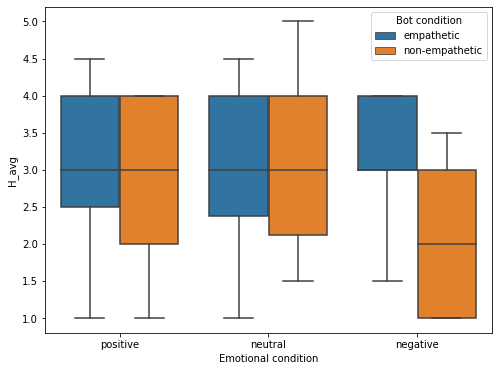

In [92]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="Emotional condition", y="H_avg", hue="Bot condition", data=df)
plt.show()

Anthropomorphism

In [93]:
df['An_avg'] = df1[['Q32_1','Q32_2','Q32_3','Q32_4','Q32_5','Q33_1','Q33_3','Q33_4','Q33_5','Q33_6','Q34_2','Q34_4','Q34_5','Q34_6','Q34_7','Q34_8']].mean(axis=1)
df['An_avg']

0      3.2500
1      3.9375
2      2.7500
3      2.7500
4      1.8125
        ...  
148    2.8750
149    3.0000
150    2.3125
151    3.7500
152    2.5000
Name: An_avg, Length: 148, dtype: float64

In [94]:
model = ols('An_avg ~ affect_mani + bot + affect_mani:bot', data=df).fit()
sm.stats.anova_lm(model, typ=2)
summary = model.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.8991,0.808,2.350,0.020,0.302,3.496
affect_mani,0.4911,0.371,1.325,0.187,-0.242,1.224
bot,1.0368,0.495,2.094,0.038,0.058,2.015
affect_mani:bot,-0.3917,0.228,-1.716,0.088,-0.843,0.059


In [95]:
model_interaction = smf.ols(formula='An_avg ~ affect_mani + bot + affect_mani:bot', data=df).fit()
summary = model_interaction.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.8991,0.808,2.350,0.020,0.302,3.496
affect_mani,0.4911,0.371,1.325,0.187,-0.242,1.224
bot,1.0368,0.495,2.094,0.038,0.058,2.015
affect_mani:bot,-0.3917,0.228,-1.716,0.088,-0.843,0.059


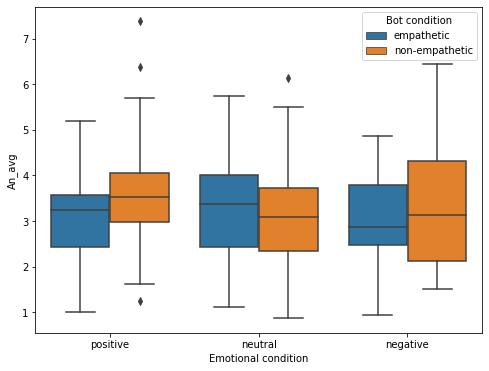

In [96]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="Emotional condition", y="An_avg", hue="Bot condition", data=df)
plt.show()